In [83]:
import pandas as pd
import os
mport matplotlib.pyplot as plt

In [84]:
# Adjust pandas display options to ensure all columns are shown
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [85]:
csv_files = []
# Walk the directory tree
for root, dirs, files in os.walk('../jrcz_datafest_2024_datasets'):
    for file in files:
        # Check if the file ends with '.csv'
        if file.endswith('.csv'):
            # Get the full path to the file
            full_path = os.path.join(root, file)
            csv_files.append(full_path)

csv_files


['../jrcz_datafest_2024_datasets\\data-bridge-openings-2023\\bridge-openings-2023-Processed-KSB-SB.csv',
 '../jrcz_datafest_2024_datasets\\data-bridge-openings-2023\\zeeland_passages_2023.csv',
 '../jrcz_datafest_2024_datasets\\data-weather\\by-day\\weer-daggegevens-2023-vlis-dates-parsed.csv',
 '../jrcz_datafest_2024_datasets\\data-weather\\by-day\\weer-daggegevens-2023-vlis.csv',
 '../jrcz_datafest_2024_datasets\\data-weather\\by-day\\weer-uurgegevens-2023-vlis-datetimes-parsed.csv',
 '../jrcz_datafest_2024_datasets\\data-weather\\by-hour\\weer-uurgegevens-processed-2023.csv',
 '../jrcz_datafest_2024_datasets\\holidays\\national_holidays_NLBEDEFR_2023.csv',
 '../jrcz_datafest_2024_datasets\\holidays\\school_holidays_NLBEDEFR_2023.csv',
 '../jrcz_datafest_2024_datasets\\intensity-speed-export-a58-east\\intensity-speed-export-2022.csv',
 '../jrcz_datafest_2024_datasets\\intensity-speed-export-a58-east\\intensity-speed-export-2023.csv',
 '../jrcz_datafest_2024_datasets\\intensity-speed-

In [86]:
df_file_path = (csv_files[11])
df = pd.read_csv(df_file_path, delimiter=',')
df.info()

C:\Users\nieks\AppData\Local\Temp\ipykernel_31996\252339799.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_file_path, delimiter=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589488 entries, 0 to 12589487
Data columns (total 17 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   id_meetlocatie                     object 
 1   ndw_index                          object 
 2   start_meetperiode                  object 
 3   eind_meetperiode                   object 
 4   waarnemingen_intensiteit           int64  
 5   waarnemingen_snelheid              int64  
 6   gebruikte_minuten_intensiteit      int64  
 7   gebruikte_minuten_snelheid         int64  
 8   data_error_snelheid                int64  
 9   data_error_intensiteit             int64  
 10  gem_intensiteit                    int64  
 11  gem_snelheid                       float64
 12  gewogen_gem_snelheid               float64
 13  rijstrook_rijbaan                  object 
 14  voertuigcategorie                  object 
 15  technical_exclusion                float64
 16  traffic_flow_dev

In [87]:
df=df.drop(columns=['gewogen_gem_snelheid'])
df=df.drop(columns=['waarnemingen_snelheid'])
df=df.drop(columns=['data_error_intensiteit'])
df=df.drop(columns=['data_error_snelheid'])
df=df.drop(columns=['gebruikte_minuten_intensiteit'])
df=df.drop(columns=['gebruikte_minuten_snelheid'])
df=df.drop(columns=['technical_exclusion'])
df=df.drop(columns=['id_meetlocatie'])
df=df.drop(columns=['gem_snelheid'])
df=df.drop(columns=['gem_intensiteit'])
df['start_meetperiode'] = pd.to_datetime(df['start_meetperiode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589488 entries, 0 to 12589487
Data columns (total 7 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   ndw_index                          object        
 1   start_meetperiode                  datetime64[ns]
 2   eind_meetperiode                   object        
 3   waarnemingen_intensiteit           int64         
 4   rijstrook_rijbaan                  object        
 5   voertuigcategorie                  object        
 6   traffic_flow_deviation_exclusions  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 672.4+ MB


In [88]:
df['date'] = df['start_meetperiode'].dt.date
df['minute'] = df['start_meetperiode'].dt.minute
df['hour'] = df['start_meetperiode'].dt.hour

df[(df['date'] == '2024-01-01') & (df['minute'] <= 1)& (df['hour'] == 17)]
filtered_df = df[(df['start_meetperiode'].dt.date == pd.to_datetime('2023-12-01').date()) & (df['minute'] <= 1) & (df['hour'] == 17)]

# Display the filtered DataFrame and the first 30 rows of the original DataFrame for verification
column_sum=filtered_df['waarnemingen_intensiteit'].sum()
# print("Sum of column 'waarnemingen_intensiteit':", column_sum)

df= df.groupby(['date', 'hour']).agg({'waarnemingen_intensiteit': 'sum'}).reset_index()
df.head(100)

,date,hour,waarnemingen_intensiteit
0,2023-01-01,0,226
1,2023-01-01,1,621
2,2023-01-01,2,426
3,2023-01-01,3,213
4,2023-01-01,4,104
5,2023-01-01,5,88
6,2023-01-01,6,146
7,2023-01-01,7,200
8,2023-01-01,8,156
9,2023-01-01,9,240


<AxesSubplot:>

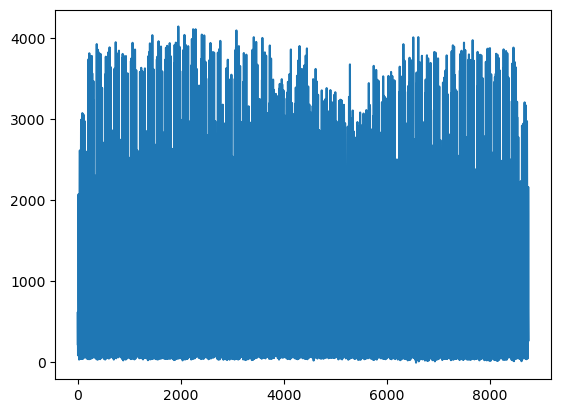